In [1]:
## Computer vision

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### CIFAR10 Dataset

In [10]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
train_images.shape

(50000, 32, 32, 3)

In [12]:
type(train_images)

numpy.ndarray

### Showing the image from numpy array to image

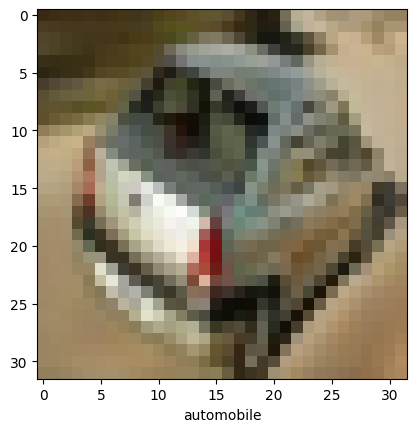

In [27]:
# Let's look at a one image
IMG_INDEX = 282  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

### convolutional base

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [29]:
model1 = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu')
])

In [30]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

### Adding Dense Layer

In [32]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [33]:
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [35]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

### Training 

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 148s 91ms/step - loss: 1.5089 - accuracy: 0.4510 - val_loss: 1.2066 - val_accuracy: 0.5660
Epoch 2/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.1244 - accuracy: 0.6025 - val_loss: 1.0807 - val_accuracy: 0.6197
Epoch 3/10
1563/1563 [==============================] - 127s 81ms/step - loss: 0.9764 - accuracy: 0.6569 - val_loss: 1.0018 - val_accuracy: 0.6484
Epoch 4/10
1563/1563 [==============================] - 121s 77ms/step - loss: 0.8840 - accuracy: 0.6901 - val_loss: 0.9804 - val_accuracy: 0.6554
Epoch 5/10
1563/1563 [==============================] - 113s 72ms/step - loss: 0.8158 - accuracy: 0.7140 - val_loss: 0.8752 - val_accuracy: 0.6986
Epoch 6/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.7607 - accuracy: 0.7348 - val_loss: 0.8849 - val_accuracy: 0.6960
Epoch 7/10
1563/1563 [==============================] - 118s 76ms/step - loss: 0.7129 - accuracy: 0.7515 - val_loss: 0

### Evaluation

In [38]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 - 8s - loss: 0.8644 - accuracy: 0.7113 - 8s/epoch - 25ms/step
Test Accuracy: 71.13%


In [39]:
## If the training data is small then CNN may not well classify, to handle with the small size of dataset we use DataAugmentation

### Data Augmentation

C:\Users\hp\AppData\Local\Temp\ipykernel_16000\456905556.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


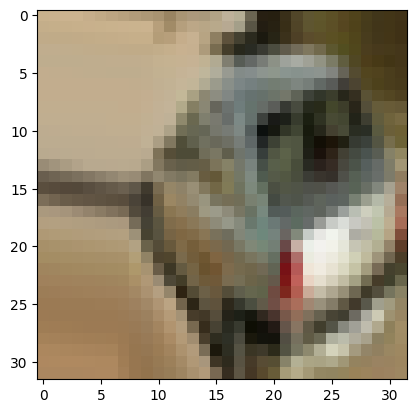

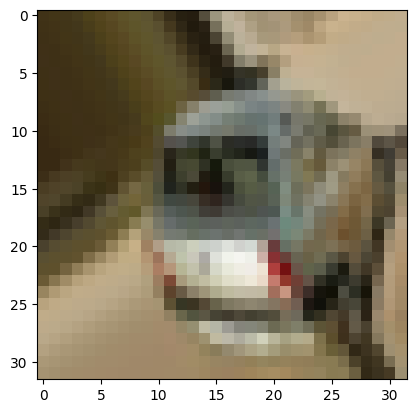

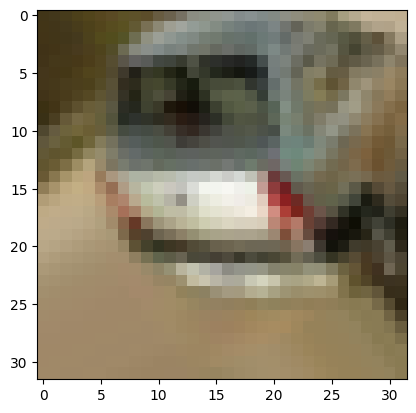

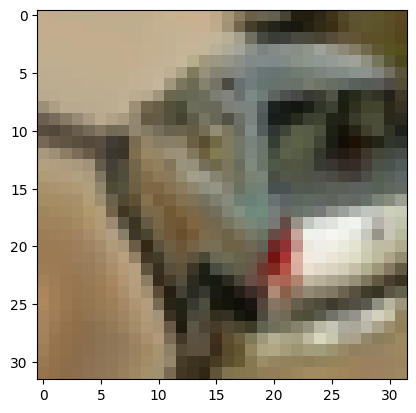

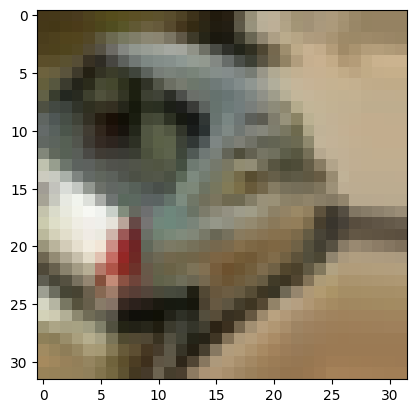

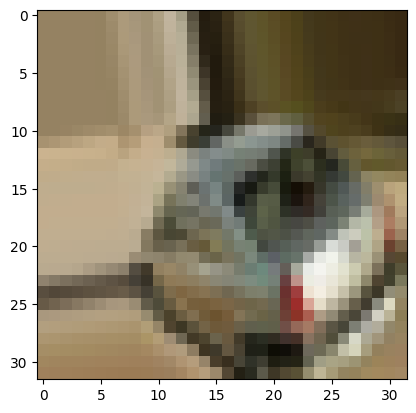

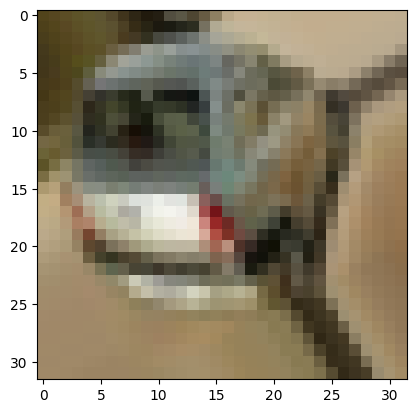

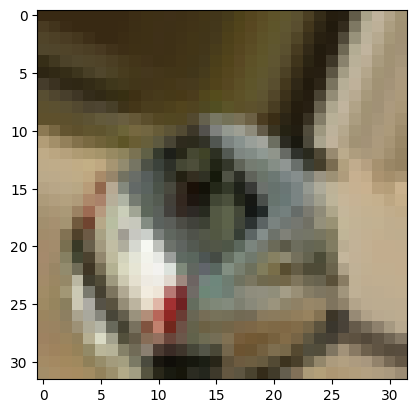

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[282]
img = image.img_to_array(test_img)  # convert image to numpy array
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 20:  # show 4 images
        break

plt.show()


In [ ]:
for i in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    print(i)

[[[[0.6798833  0.5912574  0.45359698]
   [0.72355926 0.6366379  0.50939393]
   [0.73562944 0.6540935  0.5318986 ]
   ...
   [0.2611235  0.20494033 0.10490274]
   [0.25655082 0.20164886 0.09404608]
   [0.2569377  0.20200437 0.09453582]]

  [[0.7631964  0.6691497  0.5279732 ]
   [0.78599447 0.691069   0.56111467]
   [0.78201663 0.693572   0.56749487]
   ...
   [0.26996383 0.21691182 0.10897982]
   [0.27296373 0.22270276 0.10700623]
   [0.28168476 0.2312751  0.11758715]]

  [[0.78289866 0.6979729  0.56290025]
   [0.78421944 0.69559944 0.57092124]
   [0.77766687 0.69405705 0.5713498 ]
   ...
   [0.2608181  0.21045697 0.09960715]
   [0.26846495 0.22564335 0.1079963 ]
   [0.28034496 0.24131505 0.12422613]]

  ...

  [[0.54309314 0.4322426  0.30082592]
   [0.55004066 0.44842023 0.32293004]
   [0.5599515  0.4616346  0.33614442]
   ...
   [0.5958951  0.5240302  0.38285375]
   [0.5821544  0.51156616 0.37241668]
   [0.5736526  0.5030644  0.36862746]]

  [[0.5434569  0.433152   0.30209908]
   [0.5

[[[[0.54414093 0.49714595 0.4188422 ]
   [0.6991004  0.6417747  0.5428097 ]
   [0.7304014  0.6693697  0.5652007 ]
   ...
   [0.27426872 0.2301812  0.11087473]
   [0.25830767 0.21238406 0.10258014]
   [0.2601047  0.20784314 0.09283649]]

  [[0.41016984 0.3670326  0.3036924 ]
   [0.5325129  0.4862931  0.40953976]
   [0.6874723  0.6309219  0.5335073 ]
   ...
   [0.26371783 0.2195976  0.10979368]
   [0.25649792 0.20784314 0.09644327]
   [0.2609061  0.20600414 0.09019608]]

  [[0.33624053 0.29176947 0.23353298]
   [0.4020302  0.35889295 0.29632798]
   [0.5208849  0.47544026 0.40023732]
   ...
   [0.2579182  0.21186477 0.10206085]
   [0.26036435 0.20784314 0.09257685]
   [0.25510648 0.20020452 0.09019608]]

  ...

  [[0.61322844 0.5168428  0.37750968]
   [0.64018404 0.5534093  0.40634242]
   [0.64078236 0.5739742  0.44442087]
   ...
   [0.67010456 0.59951633 0.47010455]
   [0.69114584 0.6205576  0.4929943 ]
   [0.7128612  0.64278245 0.5178018 ]]

  [[0.6286941  0.5342417  0.3833093 ]
   [0.6

[[[[0.6378596  0.5639911  0.4345793 ]
   [0.64815474 0.5768601  0.44744825]
   [0.6621846  0.59159636 0.46218455]
   ...
   [0.71491766 0.66123927 0.5587765 ]
   [0.6550993  0.6001973  0.48307744]
   [0.6313726  0.5721121  0.4592605 ]]

  [[0.633108   0.55422604 0.42481425]
   [0.6368449  0.5627228  0.433311  ]
   [0.64714    0.57559174 0.44617993]
   ...
   [0.6819392  0.6270372  0.51494986]
   [0.6313726  0.5754671  0.4559055 ]
   [0.6340387  0.57105124 0.46492648]]

  [[0.6324645  0.5479277  0.41960785]
   [0.6328544  0.55346507 0.42405325]
   [0.6358302  0.5614545  0.43204266]
   ...
   [0.6717321  0.6151947  0.49551776]
   [0.6313726  0.57149774 0.45987487]
   [0.65587026 0.5908981  0.48278865]]

  ...

  [[0.5871258  0.5109135  0.35516024]
   [0.58261347 0.51457566 0.36248457]
   [0.56997246 0.5117397  0.36153856]
   ...
   [0.6947088  0.6146122  0.47907665]
   [0.705004   0.63005495 0.5073883 ]
   [0.67763215 0.6078307  0.5003872 ]]

  [[0.5851411  0.51289815 0.3591296 ]
   [0.5

[[[[0.7761983  0.6890901  0.5645845 ]
   [0.6968519  0.6293186  0.50348395]
   [0.600482   0.5617884  0.46034667]
   ...
   [0.36678776 0.31660613 0.17831028]
   [0.36814392 0.31592804 0.17695414]
   [0.36950007 0.31524998 0.17559798]]

  [[0.77856046 0.69864285 0.57926524]
   [0.76162356 0.70421845 0.58721673]
   [0.7149185  0.6896308  0.59958845]
   ...
   [0.41667542 0.35424972 0.21127218]
   [0.44990104 0.38476306 0.24042937]
   [0.4831267  0.4152764  0.26958656]]

  [[0.7793016  0.7072187  0.59564656]
   [0.7598131  0.71271896 0.60457075]
   [0.68358666 0.66660273 0.58591497]
   ...
   [0.59359103 0.51756096 0.36854133]
   [0.6193579  0.5419716  0.39295202]
   [0.6451247  0.5663823  0.4173627 ]]

  ...

  [[0.655704   0.5187802  0.3679653 ]
   [0.60521096 0.4718776  0.32556704]
   [0.5717767  0.44173506 0.2933453 ]
   ...
   [0.5686275  0.49803922 0.36862746]
   [0.5686275  0.49803922 0.36862746]
   [0.5686275  0.49803922 0.36862746]]

  [[0.65967757 0.5216184  0.37023592]
   [0.6

[[[[0.27757365 0.24211827 0.1736778 ]
   [0.24825053 0.21400678 0.14628974]
   [0.21795988 0.18492776 0.1159991 ]
   ...
   [0.20783843 0.17176093 0.09450816]
   [0.15928532 0.12970051 0.07018482]
   [0.136053   0.10777186 0.05679146]]

  [[0.3508004  0.3106943  0.19777404]
   [0.33445737 0.2960081  0.19463496]
   [0.31143647 0.27419886 0.18615359]
   ...
   [0.17665495 0.14582945 0.08135101]
   [0.13515925 0.10729774 0.05467521]
   [0.14983931 0.11983489 0.0688545 ]]

  [[0.36616415 0.31691793 0.1789339 ]
   [0.3627759  0.31668207 0.18280464]
   [0.3579294  0.3142588  0.18886277]
   ...
   [0.15252888 0.12342668 0.06584139]
   [0.13991381 0.11115008 0.06016968]
   [0.18706654 0.15640432 0.10293777]]

  ...

  [[0.6192129  0.5329384  0.37175918]
   [0.6062551  0.5210825  0.3546589 ]
   [0.5920125  0.50980395 0.34916395]
   ...
   [0.6237274  0.4879444  0.33473477]
   [0.63278234 0.49602976 0.3396694 ]
   [0.6267242  0.49118328 0.3360345 ]]

  [[0.61231977 0.52604526 0.35797283]
   [0.5

[[[[0.18861969 0.15724714 0.08104805]
   [0.20437877 0.17351194 0.08371771]
   [0.21359758 0.1839118  0.07932796]
   ...
   [0.66216975 0.6072678  0.49147362]
   [0.6313726  0.57383245 0.45754012]
   [0.63842815 0.57504165 0.46851784]]

  [[0.3143522  0.27905375 0.2047393 ]
   [0.30320996 0.27108338 0.18685323]
   [0.28366876 0.24790649 0.15499073]
   ...
   [0.6380259  0.5831239  0.46280277]
   [0.6313726  0.5708145  0.46055812]
   [0.65502703 0.5901315  0.48209876]]

  [[0.38913897 0.35304955 0.22681978]
   [0.3988568  0.36450943 0.24206811]
   [0.4031325  0.36805895 0.25022852]
   ...
   [0.6313726  0.5742843  0.4570883 ]
   [0.63594306 0.57278246 0.46648458]
   [0.671626   0.60522145 0.4956797 ]]

  ...

  [[0.5855706  0.5124687  0.35827062]
   [0.58033967 0.51571256 0.36475843]
   [0.56206733 0.5045532  0.3529148 ]
   ...
   [0.6361601  0.4987969  0.34182593]
   [0.63009155 0.49387717 0.33805493]
   [0.6243478  0.48928213 0.33460867]]

  [[0.5838095  0.51397765 0.3612886 ]
   [0.5

[[[[0.6745098  0.60766953 0.49717095]
   [0.63732135 0.57403547 0.4676123 ]
   [0.6313726  0.5746547  0.45671785]
   ...
   [0.30260772 0.26194492 0.15219823]
   [0.31704614 0.27662858 0.17406684]
   [0.29137126 0.2541768  0.15524782]]

  [[0.6745098  0.6060326  0.48898634]
   [0.65532756 0.59040475 0.48234463]
   [0.6313726  0.57138085 0.45999172]
   ...
   [0.2612982  0.22765371 0.11834677]
   [0.23619635 0.20325299 0.10796609]
   [0.20865273 0.17728019 0.09060088]]

  [[0.6745098  0.6043956  0.4808017 ]
   [0.67333376 0.606774   0.49707696]
   [0.63423514 0.5712298  0.4650872 ]
   ...
   [0.20884065 0.17914784 0.07959116]
   [0.19625947 0.16488692 0.08282692]
   [0.1863731  0.15460445 0.08441231]]

  ...

  [[0.4696561  0.41481242 0.33450764]
   [0.5727951  0.51150525 0.42153114]
   [0.66203177 0.5948304  0.49518704]
   ...
   [0.6215345  0.56338257 0.41536245]
   [0.57746226 0.50086766 0.35325712]
   [0.6093326  0.5159599  0.35961267]]

  [[0.6667264  0.5987426  0.49675193]
   [0.6

[[[[0.20938374 0.1780112  0.09096638]
   [0.24363527 0.2101128  0.11669183]
   [0.26994377 0.23565371 0.12701856]
   ...
   [0.6745098  0.604335   0.48049855]
   [0.6220099  0.55142164 0.42593142]
   [0.58425957 0.51367134 0.38468927]]

  [[0.18279111 0.15116574 0.08083032]
   [0.19425178 0.16287923 0.08232308]
   [0.20768206 0.17739235 0.07913844]
   ...
   [0.65763307 0.58704484 0.46155462]
   [0.6056335  0.53504527 0.40843806]
   [0.581501   0.50980395 0.38150102]]

  [[0.27139452 0.236225   0.16943373]
   [0.2524757  0.21901143 0.14473188]
   [0.22073115 0.18925628 0.10256127]
   ...
   [0.6345548  0.5639666  0.43847635]
   [0.5917865  0.5211983  0.39305255]
   [0.5830396  0.50980395 0.38303956]]

  ...

  [[0.61724037 0.523001   0.36021888]
   [0.5986646  0.5086721  0.35482684]
   [0.5841942  0.51419014 0.36713138]
   ...
   [0.59847295 0.5355782  0.44319686]
   [0.48933926 0.43326536 0.3511153 ]
   [0.39834273 0.348226   0.2758754 ]]

  [[0.58931506 0.50980395 0.35186148]
   [0.5

[[[[0.75558066 0.68235296 0.565988  ]
   [0.7565102  0.68235296 0.56505847]
   [0.75743973 0.68235296 0.56412894]
   ...
   [0.29320064 0.24222024 0.11187046]
   [0.28126752 0.22820368 0.10766753]
   [0.26559767 0.21069568 0.10058949]]

  [[0.75112295 0.6811408  0.5680214 ]
   [0.75326467 0.68235296 0.568304  ]
   [0.7541942  0.68235296 0.56737447]
   ...
   [0.30642012 0.2554397  0.12238979]
   [0.28436866 0.23060845 0.10679436]
   [0.25410014 0.19919819 0.0843672 ]]

  [[0.7413863  0.6746497  0.5647758 ]
   [0.74417496 0.6765088  0.5657054 ]
   [0.7477568  0.679687   0.56821704]
   ...
   [0.350064   0.29908362 0.16169338]
   [0.31677875 0.26531768 0.13977984]
   [0.26275215 0.20816027 0.09097017]]

  ...

  [[0.54439604 0.4288308  0.29365772]
   [0.547507   0.4432772  0.31627437]
   [0.55762625 0.45853427 0.33304408]
   ...
   [0.61724377 0.5277098  0.3946621 ]
   [0.61705863 0.52686256 0.39745075]
   [0.6198473  0.5296512  0.4002394 ]]

  [[0.54190207 0.42926496 0.2966572 ]
   [0.5

[[[[0.36964116 0.31517944 0.1754569 ]
   [0.36584076 0.31707963 0.1792573 ]
   [0.35937482 0.31498152 0.187056  ]
   ...
   [0.27988437 0.23509489 0.10876887]
   [0.30127436 0.25329122 0.1028851 ]
   [0.320395   0.2669488  0.10834815]]

  [[0.45871478 0.39285728 0.24816386]
   [0.3722656  0.3138672  0.17283246]
   [0.3684652  0.3157674  0.17663285]
   ...
   [0.2977328  0.25071228 0.1020757 ]
   [0.31689173 0.26444647 0.10734721]
   [0.3345092  0.27509776 0.12032609]]

  [[0.60458076 0.5279722  0.37895265]
   [0.5230136  0.45190725 0.30458936]
   [0.42990378 0.36639822 0.22288074]
   ...
   [0.31338847 0.26194414 0.10634629]
   [0.3315064  0.27359635 0.11682283]
   [0.34789553 0.2817909  0.13594347]]

  ...

  [[0.6409442  0.56360936 0.41960785]
   [0.63986737 0.559801   0.4163379 ]
   [0.6344043  0.5516065  0.4090952 ]
   ...
   [0.5024199  0.407412   0.26403892]
   [0.49822146 0.4153714  0.28377035]
   [0.4660809  0.4048539  0.28525135]]

  [[0.64086825 0.5613024  0.41733885]
   [0.6

[[[[0.7387184  0.6745098  0.567164  ]
   [0.74622226 0.6827573  0.5748098 ]
   [0.75697255 0.69679546 0.5895334 ]
   ...
   [0.3482747  0.28198048 0.13638584]
   [0.33257002 0.27412814 0.11806369]
   [0.31542784 0.26340082 0.10692896]]

  [[0.723997   0.66402763 0.5604117 ]
   [0.7542032  0.6975216  0.5943322 ]
   [0.6590214  0.60631096 0.50379187]
   ...
   [0.33612323 0.27590474 0.12220911]
   [0.31957325 0.26636186 0.10811336]
   [0.3012511  0.2532746  0.10287847]]

  [[0.59361863 0.54090345 0.44554538]
   [0.62170106 0.5725045  0.47612837]
   [0.5758903  0.53292793 0.4354358 ]
   ...
   [0.32371867 0.26932287 0.10929777]
   [0.30539653 0.25623563 0.10406287]
   [0.28550798 0.24001555 0.10666001]]

  ...

  [[0.3340475  0.29107904 0.18979351]
   [0.45440036 0.40483356 0.2759006 ]
   [0.5433937  0.48859194 0.33610195]
   ...
   [0.63357794 0.5556358  0.42622402]
   [0.6362178  0.5619389  0.43252712]
   [0.64400613 0.57167435 0.4422626 ]]

  [[0.43426546 0.38588306 0.26227993]
   [0.5

[[[[0.741034   0.65197057 0.51416355]
   [0.7037268  0.61786115 0.48218602]
   [0.6664197  0.5837518  0.45020843]
   ...
   [0.25112393 0.19622198 0.09019608]
   [0.24360852 0.18870656 0.08651014]
   [0.25013357 0.19173345 0.09676897]]

  [[0.7916979  0.6992407  0.5564038 ]
   [0.7970275  0.7035044  0.5617334 ]
   [0.78350043 0.69079703 0.5505634 ]
   ...
   [0.24915569 0.19425371 0.08928372]
   [0.24458641 0.18895987 0.08844823]
   [0.24990682 0.19162008 0.09642885]]

  [[0.772804   0.684776   0.54184604]
   [0.78026545 0.6901056  0.54504377]
   [0.78563124 0.6943874  0.55033714]
   ...
   [0.24723527 0.19233331 0.08832352]
   [0.24650683 0.18992008 0.09132885]
   [0.2479864  0.19065987 0.09354823]]

  ...

  [[0.6571963  0.53906083 0.39088407]
   [0.70084894 0.5951166  0.45256814]
   [0.6880778  0.6058418  0.48267514]
   ...
   [0.6336258  0.5557794  0.4263676 ]
   [0.6346917  0.5589771  0.42956537]
   [0.63714826 0.56310195 0.43369016]]

  [[0.643121   0.5191765  0.36732534]
   [0.6

[[[[0.7091012  0.62427247 0.48854116]
   [0.6774864  0.5365058  0.41302893]
   [0.60629267 0.46391255 0.36672217]
   ...
   [0.71944535 0.6280723  0.48415124]
   [0.79380536 0.70092666 0.55851126]
   [0.790664   0.6973466  0.5567036 ]]

  [[0.67505383 0.5723706  0.44618627]
   [0.67459863 0.49600312 0.3901073 ]
   [0.68523437 0.56543726 0.47033703]
   ...
   [0.74888945 0.66231304 0.5219316 ]
   [0.778263   0.6886752  0.5441855 ]
   [0.78639966 0.6950021  0.55110556]]

  [[0.6035067  0.48722783 0.37109262]
   [0.6514628  0.42173943 0.33749554]
   [0.72517425 0.6413869  0.5329527 ]
   ...
   [0.75918895 0.67884946 0.5448731 ]
   [0.7573553  0.67374116 0.5352251 ]
   [0.7678949  0.68126947 0.5397421 ]]

  ...

  [[0.5872763  0.510763   0.3548593 ]
   [0.5827483  0.51450825 0.3623498 ]
   [0.56979996 0.51158285 0.3613504 ]
   ...
   [0.61509997 0.4904436  0.3422578 ]
   [0.62112266 0.49797195 0.3512918 ]
   [0.62714535 0.5055003  0.3603258 ]]

  [[0.58607924 0.51196    0.35725334]
   [0.5

[[[[0.31352445 0.27092266 0.16605243]
   [0.29390925 0.25431544 0.1411732 ]
   [0.27566972 0.23326586 0.11561881]
   ...
   [0.7890703  0.6971386  0.5537762 ]
   [0.789036   0.6971111  0.5537419 ]
   [0.7890016  0.6970836  0.5537075 ]]

  [[0.25758955 0.22306126 0.12667657]
   [0.2432475  0.21071376 0.10407072]
   [0.23825215 0.20560494 0.09096371]
   ...
   [0.7633005  0.67798775 0.5377731 ]
   [0.7632524  0.67795336 0.53775245]
   [0.7632042  0.677919   0.5377318 ]]

  [[0.19184673 0.16047418 0.08184057]
   [0.20289865 0.17184448 0.0836856 ]
   [0.21602641 0.18393286 0.08408973]
   ...
   [0.7556386  0.6786805  0.54951775]
   [0.75564545 0.6787011  0.549559  ]
   [0.75565237 0.6787217  0.5496003 ]]

  ...

  [[0.5690062  0.4984179  0.36862746]
   [0.57829154 0.5077033  0.3698414 ]
   [0.59438276 0.52277    0.3815935 ]
   ...
   [0.67058825 0.5294118  0.3764706 ]
   [0.67058825 0.5294118  0.3764706 ]
   [0.67058825 0.5294118  0.3764706 ]]

  [[0.5689859  0.4983976  0.36862746]
   [0.5

[[[[0.7534165  0.6720141  0.5361851 ]
   [0.7617079  0.6768502  0.53709054]
   [0.7738016  0.6854886  0.5422736 ]
   ...
   [0.32940242 0.28537345 0.16826329]
   [0.36931095 0.3319712  0.19301   ]
   [0.37370294 0.33840883 0.17670494]]

  [[0.7561922  0.68212944 0.5568628 ]
   [0.75535864 0.67784053 0.54783785]
   [0.75363094 0.6726575  0.5374718 ]
   ...
   [0.35449135 0.31291747 0.18665877]
   [0.37582004 0.34052593 0.1915245 ]
   [0.37151015 0.3346577  0.16654968]]

  [[0.74518275 0.67845964 0.5568628 ]
   [0.7503658  0.6801873  0.5568628 ]
   [0.75554883 0.681915   0.5568628 ]
   ...
   [0.36620495 0.3279778  0.19167887]
   [0.37414667 0.33885255 0.17981093]
   [0.3681634  0.32629085 0.1598562 ]]

  ...

  [[0.67058825 0.5294118  0.3764706 ]
   [0.6714964  0.529553   0.37551793]
   [0.63856655 0.5006006  0.34702235]
   ...
   [0.2301728  0.2273315  0.15022728]
   [0.37228045 0.32598132 0.2103422 ]
   [0.6445267  0.5731874  0.4426556 ]]

  [[0.67058825 0.5294118  0.3764706 ]
   [0.6

[[[[0.5989427  0.52297    0.3960169 ]
   [0.5970667  0.5212816  0.39451608]
   [0.59519064 0.5195932  0.39301527]
   ...
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]]

  [[0.698588   0.6131628  0.47778133]
   [0.695305   0.6101612  0.4749673 ]
   [0.69202197 0.6071596  0.47215328]
   ...
   [0.25744024 0.20084213 0.10789131]
   [0.2558456  0.19915372 0.10648431]
   [0.254251   0.1974653  0.1050773 ]]

  [[0.79341644 0.7006155  0.55812234]
   [0.7938854  0.7009907  0.5585913 ]
   [0.79435444 0.7013659  0.55906034]
   ...
   [0.30390102 0.25403517 0.15095982]
   [0.3032444  0.25319096 0.15030321]
   [0.3025878  0.25234678 0.14964661]]

  ...

  [[0.67058825 0.5294118  0.3764706 ]
   [0.67058825 0.5294118  0.3764706 ]
   [0.67058825 0.5294118  0.3764706 ]
   ...
   [0.5820822  0.5047666  0.3767003 ]
   [0.5830202  0.5052356  0.3772631 ]
   [0.5839582  0.5057046  0.37782592]]

  [[0.67058825 0.5294118  0.3764706 ]
   [0.6

[[[[0.39176103 0.34862378 0.28703684]
   [0.48553118 0.44239393 0.37187648]
   [0.61916995 0.567173   0.4788654 ]
   ...
   [0.41490048 0.39039594 0.31537753]
   [0.21506721 0.18516175 0.1290465 ]
   [0.14504914 0.11564349 0.06466309]]

  [[0.3543825  0.30826214 0.2459025 ]
   [0.35269418 0.30955693 0.25169063]
   [0.44646433 0.40332708 0.3365303 ]
   ...
   [0.22260167 0.19289985 0.13607188]
   [0.14586368 0.11635621 0.06537581]
   [0.13842724 0.11033229 0.05677605]]

  [[0.45473945 0.40082806 0.3219217 ]
   [0.37484604 0.3268654  0.25985494]
   [0.32572836 0.28221294 0.22636558]
   ...
   [0.13645592 0.11626706 0.06940036]
   [0.13694362 0.11021273 0.05736817]
   [0.1748081  0.14411452 0.08016375]]

  ...

  [[0.6401112  0.55327576 0.40616032]
   [0.6523135  0.5792156  0.44337258]
   [0.6226085  0.56571335 0.44607303]
   ...
   [0.6412866  0.54480124 0.41666505]
   [0.6469324  0.53804135 0.4202773 ]
   [0.6356628  0.5378864  0.41742185]]

  [[0.65343344 0.57972467 0.44327077]
   [0.6

[[[[0.2620579  0.20715593 0.09019608]
   [0.2567053  0.20784314 0.09623589]
   [0.2619439  0.21723238 0.10742846]
   ...
   [0.7546238  0.68197656 0.5572706 ]
   [0.7487257  0.6796406  0.5568628 ]
   [0.7475814  0.67905223 0.5568628 ]]

  [[0.2572536  0.2023516  0.09019608]
   [0.2599082  0.20784314 0.09303301]
   [0.2571396  0.21082662 0.10102269]
   ...
   [0.75245947 0.68551874 0.563697  ]
   [0.7517153  0.6800857  0.5568628 ]
   [0.7590356  0.68191576 0.5568628 ]]

  [[0.25244924 0.19754727 0.09019608]
   [0.26219618 0.2072942  0.09019608]
   [0.25661314 0.20784314 0.09632807]
   ...
   [0.76232094 0.6898728  0.5678983 ]
   [0.76146096 0.68192965 0.5571161 ]
   [0.76321065 0.67992663 0.5568628 ]]

  ...

  [[0.74665666 0.67162734 0.540657  ]
   [0.7411665  0.6692777  0.542487  ]
   [0.7356763  0.6674477  0.54431707]
   ...
   [0.32366046 0.32306957 0.2741418 ]
   [0.17746416 0.18154114 0.1356527 ]
   [0.11563077 0.10305975 0.05599312]]

  [[0.7380661  0.66824424 0.5435205 ]
   [0.7

[[[[0.24865763 0.19375566 0.08903469]
   [0.25732455 0.20242259 0.09019608]
   [0.2598066  0.20784314 0.09313458]
   ...
   [0.75130934 0.6911745  0.58383757]
   [0.7443635  0.68016213 0.57190603]
   [0.73806053 0.6745098  0.56782186]]

  [[0.24318811 0.18826072 0.08635079]
   [0.24963863 0.19473666 0.08952519]
   [0.25879604 0.20389408 0.09019608]
   ...
   [0.6141569  0.5646977  0.46369857]
   [0.7361801  0.6812309  0.5798093 ]
   [0.7125485  0.6535327  0.5512657 ]]

  [[0.24875933 0.19104633 0.09470761]
   [0.2440674  0.18916544 0.08673958]
   [0.25061962 0.19571765 0.09001569]
   ...
   [0.5250086  0.48456973 0.39199042]
   [0.55285245 0.5076133  0.41761562]
   [0.38975814 0.35653198 0.29718244]]

  ...

  [[0.6338583  0.5422265  0.41817206]
   [0.6313727  0.5372552  0.41568643]
   [0.62888706 0.5347694  0.4132008 ]
   ...
   [0.605273   0.5202969  0.35426608]
   [0.591504   0.50980395 0.3496725 ]
   [0.5882279  0.50981134 0.35295603]]

  [[0.63017744 0.5360598  0.41449112]
   [0.6

[[[[0.7387487  0.6745098  0.56713367]
   [0.75080293 0.689755   0.5831003 ]
   [0.69144136 0.6351959  0.53056514]
   ...
   [0.2625637  0.20766172 0.09019608]
   [0.2527378  0.1978358  0.09019608]
   [0.24560137 0.1906994  0.08750656]]

  [[0.7108188  0.65199095 0.5495012 ]
   [0.7338161  0.68014425 0.5788361 ]
   [0.5891539  0.54208237 0.44215852]
   ...
   [0.2679005  0.21413212 0.09890316]
   [0.2512211  0.19631913 0.0909473 ]
   [0.24431092 0.18882214 0.08803501]]

  [[0.5010377  0.45720693 0.37858975]
   [0.5720325  0.52524924 0.4325296 ]
   [0.53917027 0.49827108 0.4054728 ]
   ...
   [0.27117294 0.21649429 0.10058874]
   [0.27072525 0.21582328 0.10833378]
   [0.26113945 0.2050988  0.10588405]]

  ...

  [[0.22375664 0.18846253 0.11491419]
   [0.20620136 0.16996166 0.0955911 ]
   [0.39289385 0.34682822 0.23315397]
   ...
   [0.6257052  0.5355091  0.40893102]
   [0.62920135 0.5390053  0.4106791 ]
   [0.6307101  0.53985155 0.41110224]]

  [[0.20193005 0.16663593 0.09490646]
   [0.3

[[[[0.3572738  0.31393102 0.18968229]
   [0.34761813 0.3084762  0.19948366]
   [0.30700934 0.27000472 0.18452252]
   ...
   [0.14974952 0.11975632 0.06877592]
   [0.2940101  0.26623827 0.20265543]
   [0.52084005 0.49625212 0.41252837]]

  [[0.36739567 0.31630218 0.17770237]
   [0.36153623 0.31606224 0.18435422]
   [0.35298702 0.31178764 0.19504075]
   ...
   [0.21873622 0.18892993 0.1324676 ]
   [0.45370382 0.43013316 0.35149547]
   [0.66356397 0.63681364 0.54227746]]

  [[0.403235   0.3419065  0.19947752]
   [0.3695269  0.31523657 0.17557114]
   [0.3652523  0.31737387 0.17984575]
   ...
   [0.37876004 0.35327873 0.281679  ]
   [0.5964278  0.5706946  0.48124453]
   [0.72880834 0.6925861  0.59893256]]

  ...

  [[0.5833258  0.51421946 0.36177227]
   [0.5707631  0.5084172  0.3604564 ]
   [0.5038274  0.44619715 0.29475802]
   ...
   [0.4193345  0.37619725 0.31198427]
   [0.51888424 0.473573   0.39863682]
   [0.64712256 0.5932621  0.5012275 ]]

  [[0.57900083 0.516382   0.3660972 ]
   [0.5

[[[[0.28669167 0.250506   0.14645858]
   [0.28130987 0.24635513 0.13176553]
   [0.2707816  0.23150809 0.11386103]
   ...
   [0.61443746 0.54384923 0.41822025]
   [0.58047783 0.50980395 0.38047785]
   [0.58431375 0.50980395 0.38431373]]

  [[0.21091673 0.17954418 0.0853335 ]
   [0.2203183  0.19021873 0.08419721]
   [0.23156449 0.19907953 0.08402751]
   ...
   [0.6099467  0.5393585  0.41323057]
   [0.58097684 0.50980395 0.3809768 ]
   [0.58431375 0.50980395 0.38431373]]

  [[0.19363305 0.1622605  0.08269968]
   [0.20790565 0.1774321  0.08441139]
   [0.2194702  0.18620896 0.08105279]
   ...
   [0.6071073  0.5338064  0.40563306]
   [0.5873666  0.51492053 0.38622954]
   [0.58431375 0.50980395 0.38431373]]

  ...

  [[0.60784984 0.51272625 0.3809411 ]
   [0.6018778  0.51674634 0.38619944]
   [0.5698418  0.49939924 0.36937228]
   ...
   [0.6466262  0.5564301  0.39434087]
   [0.6491061  0.55891    0.39868075]
   [0.65158606 0.56139    0.40302065]]

  [[0.61517656 0.508843   0.378791  ]
   [0.6

[[[[0.23916845 0.1822821  0.08235294]
   [0.24313726 0.1882353  0.0835705 ]
   [0.24413316 0.18873325 0.08776836]
   ...
   [0.65939564 0.6003252  0.478646  ]
   [0.66228    0.5934988  0.4813206 ]
   [0.68105835 0.6044965  0.48930916]]

  [[0.23730037 0.17947996 0.08235294]
   [0.24313726 0.1882353  0.08263645]
   [0.24313726 0.1882353  0.08583841]
   ...
   [0.72004473 0.65495175 0.52526814]
   [0.738308   0.6624367  0.53809917]
   [0.7604473  0.6756902  0.5506005 ]]

  [[0.23543227 0.17667782 0.08235294]
   [0.24183619 0.1862837  0.08235294]
   [0.24313726 0.1882353  0.08490437]
   ...
   [0.63744426 0.57133865 0.44545695]
   [0.7270086  0.649239   0.5210203 ]
   [0.77984935 0.6909315  0.56513715]]

  ...

  [[0.62749577 0.5372997  0.4098263 ]
   [0.62599117 0.5357951  0.409074  ]
   [0.6244866  0.53429055 0.40832174]
   ...
   [0.40016007 0.36572653 0.29299772]
   [0.27580065 0.24013285 0.16777803]
   [0.44255275 0.39304033 0.304878  ]]

  [[0.6276028  0.53740674 0.40987983]
   [0.6

[[[[0.6545964  0.56331307 0.42203608]
   [0.7150807  0.6219155  0.48073906]
   [0.7810408  0.6862427  0.5497563 ]
   ...
   [0.38816133 0.41318372 0.40153012]
   [0.4554174  0.4759238  0.44220403]
   [0.61470366 0.6111832  0.5500666 ]]

  [[0.71109235 0.6190069  0.47601113]
   [0.7506421  0.6589858  0.5188229 ]
   [0.78574294 0.6978885  0.5608759 ]
   ...
   [0.41301343 0.43653128 0.40533194]
   [0.55869514 0.57838535 0.5349117 ]
   [0.723951   0.7466751  0.6782491 ]]

  [[0.75148946 0.66613513 0.5284468 ]
   [0.7848402  0.7021199  0.56505835]
   [0.7795598  0.700256   0.56752604]
   ...
   [0.4538108  0.472654   0.41804385]
   [0.68497115 0.699523   0.6378936 ]
   [0.7405491  0.7607661  0.6827032 ]]

  ...

  [[0.62545025 0.5033815  0.35778323]
   [0.620381   0.4970449  0.35017934]
   [0.61531174 0.49070832 0.34257546]
   ...
   [0.29046512 0.24979049 0.15768018]
   [0.44060996 0.39185438 0.2665718 ]
   [0.5418094  0.48710087 0.33503023]]

  [[0.61355025 0.48850644 0.33993322]
   [0.6

[[[[0.7716529  0.6811465  0.5363588 ]
   [0.71417993 0.62409985 0.48044768]
   [0.74825025 0.65699446 0.51691926]
   ...
   [0.38185483 0.34189045 0.20134711]
   [0.36996612 0.327267   0.19119364]
   [0.36341715 0.3170027  0.18200308]]

  [[0.7600211  0.6756371  0.5363687 ]
   [0.76625484 0.6831298  0.5486025 ]
   [0.7868371  0.70498705 0.5685529 ]
   ...
   [0.39870656 0.34904957 0.19430505]
   [0.39059845 0.33801085 0.18912321]
   [0.37049428 0.31475288 0.17460379]]

  [[0.75514203 0.67719084 0.54653853]
   [0.76806    0.6938696  0.56357646]
   [0.7707072  0.6956688  0.5684756 ]
   ...
   [0.49268958 0.43109185 0.26895115]
   [0.49001613 0.42635134 0.26948068]
   [0.4798097  0.4122302  0.26667574]]

  ...

  [[0.6133801  0.48119983 0.32941177]
   [0.6146443  0.48183194 0.32941177]
   [0.61624193 0.48279747 0.32974517]
   ...
   [0.63906235 0.56266844 0.41960785]
   [0.63115746 0.55664766 0.41547114]
   [0.6190541  0.5445443  0.40336776]]

  [[0.62600255 0.49060595 0.3356015 ]
   [0.6

[[[[0.6745098  0.605008   0.4838635 ]
   [0.6639161  0.5982125  0.48937163]
   [0.6313726  0.5703069  0.46106568]
   ...
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]]

  [[0.6745098  0.60466915 0.48216903]
   [0.66764396 0.6016015  0.4924217 ]
   [0.6313726  0.5696291  0.46174347]
   ...
   [0.22174089 0.16304283 0.07639191]
   [0.22845791 0.17015497 0.08231869]
   [0.23517494 0.17726712 0.08824547]]

  [[0.6745098  0.60433024 0.48047456]
   [0.67137176 0.6049904  0.49547172]
   [0.6313726  0.5689513  0.46242127]
   ...
   [0.27643904 0.22095853 0.12465499]
   [0.28315607 0.22807068 0.13058178]
   [0.2877563  0.23327768 0.13481511]]

  ...

  [[0.7042095  0.6358153  0.5039882 ]
   [0.561362   0.51389325 0.3996511 ]
   [0.3969466  0.3590605  0.2715533 ]
   ...
   [0.6380896  0.5495768  0.4106005 ]
   [0.64135647 0.5457757  0.41376185]
   [0.63080335 0.5370266  0.4095935 ]]

  [[0.68981963 0.6089476  0.4508932 ]
   [0.6

[[[[0.24462184 0.18971989 0.08701681]
   [0.25360337 0.1987014  0.09019608]
   [0.2607324  0.20784314 0.09220878]
   ...
   [0.7563902  0.6809354  0.5540276 ]
   [0.75443774 0.6815446  0.5568628 ]
   [0.75059515 0.68026376 0.5568628 ]]

  [[0.24403419 0.18868376 0.08761992]
   [0.25034752 0.19544555 0.08987964]
   [0.26219186 0.2072899  0.09019608]
   ...
   [0.74701077 0.679069   0.5568628 ]
   [0.7476712  0.6790747  0.5568628 ]
   [0.7527947  0.68035555 0.5568628 ]]

  [[0.24641572 0.18987453 0.09119219]
   [0.247966   0.19306403 0.08868888]
   [0.2586196  0.20371762 0.09019608]
   ...
   [0.75757384 0.6815503  0.5568628 ]
   [0.7612626  0.6818747  0.5568628 ]
   [0.76254344 0.68059385 0.5568628 ]]

  ...

  [[0.6281843  0.5348     0.40857646]
   [0.62946516 0.53736174 0.40985733]
   [0.63074607 0.5399234  0.41113818]
   ...
   [0.54619646 0.4400009  0.31168753]
   [0.5519818  0.43208182 0.29257405]
   [0.5770057  0.44591826 0.2985743 ]]

  [[0.630236   0.54003996 0.41119644]
   [0.6

[[[[0.63761604 0.5670278  0.4415376 ]
   [0.6745098  0.6051516  0.48458135]
   [0.6635317  0.5978631  0.48905715]
   ...
   [0.29130244 0.24399804 0.13363077]
   [0.30891484 0.26423395 0.15685418]
   [0.31558976 0.27225944 0.16824135]]

  [[0.6165275  0.54593927 0.42044905]
   [0.67187124 0.601283   0.47579277]
   [0.6745098  0.6074353  0.49599975]
   ...
   [0.2842334  0.24507365 0.12902571]
   [0.29901415 0.26282045 0.15203515]
   [0.27876112 0.24253668 0.14506271]]

  [[0.6035379  0.5329497  0.40610963]
   [0.6507827  0.5801945  0.45470425]
   [0.6745098  0.6060294  0.48897025]
   ...
   [0.24049081 0.20909859 0.09544172]
   [0.21546948 0.18418688 0.08348329]
   [0.20442474 0.17305219 0.08709437]]

  ...

  [[0.45342478 0.39959553 0.32081246]
   [0.547078   0.4873954  0.39983234]
   [0.6407312  0.5751953  0.4788522 ]
   ...
   [0.6548327  0.6135036  0.47622252]
   [0.5785746  0.5215792  0.37802237]
   [0.594884   0.5219417  0.36453268]]

  [[0.66294634 0.59559256 0.49549192]
   [0.6

[[[[0.75741214 0.6941241  0.5724434 ]
   [0.765705   0.70204544 0.5797224 ]
   [0.7744111  0.7091441  0.5986105 ]
   ...
   [0.2754474  0.23947784 0.14238624]
   [0.2844452  0.24778351 0.1496537 ]
   [0.293443   0.25608918 0.15692116]]

  [[0.7601459  0.6941934  0.57592696]
   [0.7629149  0.7035785  0.58762234]
   [0.76850283 0.7159219  0.5979806 ]
   ...
   [0.2049091  0.17353655 0.08872906]
   [0.2083698  0.17699726 0.09045941]
   [0.2118305  0.18045795 0.09218976]]

  [[0.761003   0.69474703 0.5828652 ]
   [0.76337993 0.7052046  0.5939399 ]
   [0.7277203  0.68839246 0.5648235 ]
   ...
   [0.18977983 0.15787491 0.08781905]
   [0.1811281  0.14956926 0.07916732]
   [0.17806828 0.14669573 0.07530865]]

  ...

  [[0.5436419  0.4297016  0.29568782]
   [0.5549064  0.45263174 0.3248196 ]
   [0.57012177 0.47208253 0.3430087 ]
   ...
   [0.60784316 0.5176471  0.38972956]
   [0.60784316 0.5176471  0.3893835 ]
   [0.60784316 0.5176471  0.38903743]]

  [[0.5416211  0.4285624  0.29567367]
   [0.5

[[[[0.31591073 0.2732224  0.16952527]
   [0.3142972  0.2683818  0.16307116]
   [0.3064328  0.25729036 0.15349163]
   ...
   [0.15333508 0.12289368 0.07191329]
   [0.34890133 0.32261303 0.2538378 ]
   [0.5891732  0.56354994 0.47464943]]

  [[0.2749784  0.23904492 0.14200744]
   [0.31693003 0.2777695  0.17589144]
   [0.3160611  0.27367353 0.17012681]
   ...
   [0.20712075 0.17700054 0.12163696]
   [0.46272022 0.43901294 0.3596922 ]
   [0.6919565  0.6647759  0.5680888 ]]

  [[0.20471658 0.17334403 0.0886328 ]
   [0.2291167  0.19671103 0.10496529]
   [0.27106833 0.23543562 0.1388493 ]
   ...
   [0.32236263 0.29535708 0.22909224]
   [0.56550354 0.5402389  0.45313156]
   [0.7265337  0.6913613  0.5971828 ]]

  ...

  [[0.6152052  0.512716   0.36672956]
   [0.6032676  0.51492184 0.3590723 ]
   [0.5838363  0.5197607  0.3745125 ]
   ...
   [0.38722658 0.34408933 0.28293422]
   [0.4549946  0.41185734 0.34424815]
   [0.53840035 0.49178803 0.4142497 ]]

  [[0.6273455  0.5214213  0.36470398]
   [0.6

[[[[0.2904257  0.24431854 0.10481586]
   [0.31332436 0.26189837 0.10632797]
   [0.33387408 0.27478018 0.1195851 ]
   ...
   [0.74033666 0.6745098  0.56554574]
   [0.7384393  0.6745098  0.5674431 ]
   [0.7344031  0.672371   0.56720155]]

  [[0.27345127 0.22946593 0.11118127]
   [0.29847178 0.25128937 0.10208437]
   [0.32101884 0.26856056 0.10844851]
   ...
   [0.73558843 0.67326    0.56779426]
   [0.7279991  0.66756797 0.56399953]
   [0.70418495 0.6465203  0.5468774 ]]

  [[0.2628455  0.2184345  0.10863058]
   [0.29310787 0.24616009 0.11345033]
   [0.32455266 0.2850436  0.1120963 ]
   ...
   [0.7215951  0.66276497 0.5607976 ]
   [0.6081248  0.5568642  0.47002926]
   [0.4942844  0.45061314 0.37895694]]

  ...

  [[0.63095236 0.5407563  0.4115546 ]
   [0.6271577  0.5369616  0.40965727]
   [0.62369585 0.5334998  0.40792635]
   ...
   [0.20009582 0.1648017  0.09322508]
   [0.23691086 0.20121257 0.12609649]
   [0.26199317 0.22002429 0.13550234]]

  [[0.62395567 0.5337596  0.40805626]
   [0.6

[[[[0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]
   [0.22923818 0.17041466 0.07932498]
   ...
   [0.6745098  0.60647875 0.49121717]
   [0.65462315 0.5840349  0.45854473]
   [0.604102   0.5335138  0.40673643]]

  [[0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]
   [0.23380429 0.17498076 0.08160803]
   ...
   [0.6745098  0.6053372  0.48550954]
   [0.63750035 0.5669121  0.4414219 ]
   [0.5938283  0.5232401  0.39532122]]

  [[0.26802674 0.21205138 0.11723236]
   [0.24843638 0.19123663 0.0988098 ]
   [0.2409907  0.18325731 0.08611199]
   ...
   [0.6745098  0.6041957  0.47980192]
   [0.6203775  0.54978925 0.42429903]
   [0.5835546  0.5129664  0.38390598]]

  ...

  [[0.5944662  0.54249793 0.42425388]
   [0.6999394  0.6829424  0.5898567 ]
   [0.8460386  0.8516078  0.7785117 ]
   ...
   [0.3904342  0.34103644 0.27048323]
   [0.36349776 0.31654876 0.25211746]
   [0.33656132 0.29206112 0.2337517 ]]

  [[0.58062065 0.51486194 0.36716595]
   [0.6

[[[[0.7633241  0.6798132  0.5568628 ]
   [0.7617005  0.6814368  0.5568628 ]
   [0.7579545  0.6816455  0.5568628 ]
   ...
   [0.2800778  0.2338068  0.12790677]
   [0.34514487 0.30183148 0.18114349]
   [0.36848992 0.3309156  0.19265814]]

  [[0.76247376 0.6806635  0.5590949 ]
   [0.7640974  0.6790399  0.5574713 ]
   [0.76369077 0.6794465  0.5568628 ]
   ...
   [0.3239629  0.27968672 0.16381279]
   [0.3617502  0.32225025 0.18976969]
   [0.37561592 0.3403218  0.19009568]]

  [[0.7588599  0.68235296 0.5627088 ]
   [0.7604835  0.68235296 0.56108516]
   [0.76210713 0.68103015 0.55946153]
   ...
   [0.35501048 0.3135849  0.18688124]
   [0.37571365 0.34020326 0.19575402]
   [0.37362114 0.33832702 0.17613223]]

  ...

  [[0.5747691  0.4767298  0.3509225 ]
   [0.5954722  0.497433   0.36866805]
   [0.61848617 0.5227577  0.37948132]
   ...
   [0.63777363 0.5458893  0.41553363]
   [0.6448347  0.539824   0.41987476]
   [0.6398388  0.53823847 0.4187849 ]]

  [[0.5887325  0.4906933  0.36289117]
   [0.6

[[[[0.3676508  0.32112515 0.18142578]
   [0.3766111  0.33615595 0.19904831]
   [0.39291665 0.35548338 0.22172245]
   ...
   [0.5606103  0.5354199  0.4486832 ]
   [0.7175901  0.6865455  0.5903031 ]
   [0.75476295 0.7065616  0.61889756]]

  [[0.4015376  0.34397897 0.19203494]
   [0.40225485 0.35082796 0.19680586]
   [0.3771946  0.33270007 0.17652655]
   ...
   [0.68016994 0.65316796 0.55737376]
   [0.7411397  0.6992261  0.6084182 ]
   [0.7378628  0.6855341  0.59116966]]

  [[0.580097   0.51204777 0.35069755]
   [0.5275861  0.4640697  0.30053532]
   [0.46559644 0.41172    0.2483106 ]
   ...
   [0.72751653 0.69189054 0.59793884]
   [0.75567776 0.70439696 0.61632013]
   [0.7070672  0.6529269  0.54769343]]

  ...

  [[0.5473929  0.49121276 0.3369063 ]
   [0.5380773  0.4831753  0.32789385]
   [0.5274458  0.47358215 0.32531366]
   ...
   [0.64137286 0.5494124  0.3860298 ]
   [0.64741665 0.5572206  0.39572415]
   [0.6534604  0.5632643  0.40630072]]

  [[0.53493345 0.4800315  0.32370213]
   [0.5

[[[[0.6561547  0.58556646 0.46007624]
   [0.6745098  0.60649306 0.49128854]
   [0.647615   0.58339334 0.4760344 ]
   ...
   [0.2888376  0.23543374 0.13509189]
   [0.30206677 0.2516769  0.1491256 ]
   [0.3131925  0.26598135 0.16025129]]

  [[0.6367601  0.5661719  0.44068164]
   [0.6745098  0.60520005 0.4848237 ]
   [0.66183776 0.5963231  0.48767117]
   ...
   [0.3059104  0.26070142 0.15287687]
   [0.31515482 0.2709546  0.16650157]
   [0.3167442  0.27572277 0.17285912]]

  [[0.6173655  0.54677725 0.42128703]
   [0.67429215 0.6037039  0.47821373]
   [0.6745098  0.6077022  0.4973344 ]
   ...
   [0.29801244 0.26037845 0.14855424]
   [0.30197975 0.26396924 0.16381621]
   [0.26065573 0.225824   0.13043913]]

  ...

  [[0.73998874 0.6745098  0.56589365]
   [0.7383994  0.6745098  0.567483  ]
   [0.7354751  0.673175   0.5677376 ]
   ...
   [0.33677053 0.33827078 0.28465027]
   [0.66064906 0.6670048  0.61338836]
   [0.67351925 0.66488755 0.59763557]]

  [[0.7358108  0.67342675 0.5679054 ]
   [0.7

[[[[0.6719626  0.6013744  0.4758842 ]
   [0.6745098  0.60757124 0.49667954]
   [0.63548714 0.572368   0.46611157]
   ...
   [0.2933208  0.24043205 0.14037961]
   [0.29945004 0.24831249 0.14650884]
   [0.30557925 0.25619292 0.15263808]]

  [[0.65649223 0.585904   0.46041375]
   [0.6745098  0.60653985 0.49152273]
   [0.64683217 0.58268166 0.47539383]
   ...
   [0.31428608 0.2706168  0.16587399]
   [0.3161753  0.27401614 0.17058362]
   [0.31705093 0.27664298 0.17408603]]

  [[0.6410218  0.57043356 0.4449433 ]
   [0.6745098  0.6055085  0.4863659 ]
   [0.65817714 0.5929952  0.4846761 ]
   ...
   [0.25710464 0.22275011 0.1240924 ]
   [0.2391938  0.20601298 0.11310448]
   [0.21642807 0.18499847 0.09471679]]

  ...

  [[0.6348836  0.49771076 0.34093013]
   [0.64164203 0.5035936  0.34593743]
   [0.6486469  0.5097229  0.35119104]
   ...
   [0.6319576  0.5479364  0.4017551 ]
   [0.6395965  0.5593947  0.41606706]
   [0.63903916 0.5626568  0.41960785]]

  [[0.6695796  0.5274322  0.36664787]
   [0.6

[[[[0.60287875 0.5770479  0.48710907]
   [0.43240717 0.4083758  0.33170134]
   [0.24352367 0.21438733 0.15558024]
   ...
   [0.37791127 0.33481762 0.1730262 ]
   [0.42622745 0.3721201  0.21312252]
   [0.4768783  0.41525593 0.25547218]]

  [[0.7220648  0.68895495 0.5937452 ]
   [0.60358775 0.5777461  0.4877536 ]
   [0.43320212 0.4091922  0.33244255]
   ...
   [0.49976012 0.4507583  0.28633064]
   [0.58833706 0.52537024 0.36052728]
   [0.66588724 0.59464884 0.42630544]]

  [[0.7553867  0.7068975  0.61937743]
   [0.72220445 0.6890302  0.59385264]
   [0.60429674 0.57844436 0.48839813]
   ...
   [0.6965304  0.6399241  0.4896376 ]
   [0.7115866  0.6336986  0.47958836]
   [0.77389723 0.68595344 0.5252487 ]]

  ...

  [[0.5548764  0.49470642 0.40641224]
   [0.6634511  0.5960131  0.49566016]
   [0.68756866 0.61611116 0.50369936]
   ...
   [0.6392239  0.55164903 0.40394205]
   [0.65453875 0.5797263  0.44222924]
   [0.6274906  0.5679325  0.4456292 ]]

  [[0.6786607  0.6086878  0.50073004]
   [0.7

[[[[0.6368836  0.57363755 0.46725413]
   [0.6313726  0.5748148  0.45655778]
   [0.6756405  0.62073857 0.50747013]
   ...
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]]

  [[0.6313726  0.5686627  0.46270984]
   [0.6313726  0.57585204 0.45552054]
   [0.68393856 0.6290366  0.5173241 ]
   ...
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]]

  [[0.6629236  0.5956378  0.4819972 ]
   [0.6686784  0.61088914 0.4870612 ]
   [0.7134244  0.6574862  0.5462933 ]
   ...
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]]

  ...

  [[0.50045323 0.44416133 0.35420275]
   [0.20552446 0.18041097 0.12364699]
   [0.12588131 0.12104791 0.07485097]
   ...
   [0.630935   0.54030144 0.41132718]
   [0.6304579  0.5393471  0.41085002]
   [0.6299807  0.5383927  0.41037282]]

  [[0.6678948  0.59287405 0.48658758]
   [0.3

[[[[0.6655526  0.61065066 0.49549082]
   [0.72486377 0.6717704  0.57281804]
   [0.7415322  0.69943744 0.6087201 ]
   ...
   [0.27514258 0.23981515 0.17278215]
   [0.31613553 0.27865055 0.18788481]
   [0.35072675 0.3106575  0.1978661 ]]

  [[0.63948953 0.5845876  0.46454087]
   [0.6971717  0.6424494  0.53372335]
   [0.7582681  0.70713973 0.6199771 ]
   ...
   [0.32646233 0.28843385 0.19168942]
   [0.3529008  0.31174454 0.19514851]
   [0.3615309  0.31605956 0.1843609 ]]

  [[0.6313726  0.57422733 0.45714524]
   [0.67092896 0.616027   0.50187516]
   [0.73057604 0.6778187  0.5808825 ]
   ...
   [0.35507488 0.31283155 0.19243093]
   [0.36370495 0.3171466  0.18164332]
   [0.36852047 0.31573978 0.17657758]]

  ...

  [[0.75675374 0.68235296 0.5648149 ]
   [0.75459623 0.68235296 0.56697243]
   [0.75143373 0.68134797 0.568125  ]
   ...
   [0.8180868  0.80741066 0.71370566]
   [0.7462746  0.7357666  0.6249486 ]
   [0.5534967  0.50304717 0.3580849 ]]

  [[0.7540527  0.68235296 0.56751597]
   [0.7

[[[[0.3554608  0.3141639  0.18707424]
   [0.37397054 0.33693802 0.19362578]
   [0.3688159  0.32539633 0.17216021]
   ...
   [0.41735438 0.35487324 0.21186799]
   [0.4802853  0.41266695 0.2670931 ]
   [0.5432162  0.47046068 0.3223182 ]]

  [[0.31381306 0.26322988 0.14871421]
   [0.33745176 0.28274682 0.15759417]
   [0.3758119  0.32177594 0.19147758]
   ...
   [0.5591088  0.48505586 0.33626473]
   [0.6091689  0.5323189  0.3832993 ]
   [0.65797246 0.57855386 0.42953426]]

  [[0.2852544  0.23305088 0.13530616]
   [0.38619676 0.34070188 0.24383035]
   [0.4850536  0.450028   0.35081884]
   ...
   [0.67029727 0.59023005 0.44121042]
   [0.71528155 0.63307005 0.48433334]
   [0.72940886 0.6484817  0.5023136 ]]

  ...

  [[0.40734732 0.364955   0.26618302]
   [0.42612085 0.3753259  0.26749286]
   [0.4490576  0.38711086 0.27115166]
   ...
   [0.63385475 0.55191994 0.40917698]
   [0.61814994 0.5428578  0.40138164]
   [0.6025175  0.5295489  0.3883724 ]]

  [[0.2116063  0.19491522 0.12824287]
   [0.2

[[[[0.25902337 0.21333833 0.10353442]
   [0.27203512 0.22822681 0.11171232]
   [0.29778573 0.2507586  0.10205585]
   ...
   [0.58431375 0.50980395 0.38431373]
   [0.58431375 0.50980395 0.38431373]
   [0.59723926 0.52143687 0.39465412]]

  [[0.2563843  0.2098196  0.10001568]
   [0.2660408  0.2226949  0.11289097]
   [0.29074824 0.2446008  0.1046949 ]
   ...
   [0.65828943 0.57638204 0.44349426]
   [0.6775855  0.5939605  0.4597791 ]
   [0.7002233  0.61465794 0.479183  ]]

  [[0.2556731  0.20784314 0.09726807]
   [0.26340175 0.21917616 0.10937224]
   [0.28371078 0.238443   0.10733396]
   ...
   [0.79899126 0.7050754  0.56369716]
   [0.7957573  0.7024882  0.5604632 ]
   [0.7925233  0.69990104 0.5572292 ]]

  ...

  [[0.6226368  0.53892606 0.3911217 ]
   [0.6190545  0.52840126 0.38367382]
   [0.61863947 0.5168073  0.38130158]
   ...
   [0.5531577  0.45257622 0.32708603]
   [0.54534066 0.43786144 0.3086923 ]
   [0.54913366 0.43086118 0.29298094]]

  [[0.6162826  0.52896625 0.38292128]
   [0.6

[[[[0.6415986  0.5613603  0.4301416 ]
   [0.66413105 0.58156925 0.4480967 ]
   [0.618454   0.533462   0.3977355 ]
   ...
   [0.50444716 0.45538083 0.2910688 ]
   [0.5333607  0.4726183  0.3085699 ]
   [0.5609013  0.4945621  0.3321119 ]]

  [[0.7422749  0.65310514 0.51522726]
   [0.7458655  0.65331495 0.5131832 ]
   [0.67888    0.5868371  0.4453837 ]
   ...
   [0.6949751  0.63344854 0.47796905]
   [0.70414007 0.62981504 0.46496797]
   [0.7019274  0.6269999  0.46047446]]

  [[0.79159844 0.6991611  0.55630434]
   [0.76148266 0.6701723  0.52618855]
   [0.71177214 0.6204692  0.4765375 ]
   ...
   [0.64317536 0.5544818  0.41785634]
   [0.7853998  0.6918504  0.5344932 ]
   [0.7657621  0.68729013 0.52142763]]

  ...

  [[0.6103811  0.48350728 0.33448768]
   [0.6092542  0.4812534  0.3322338 ]
   [0.60812724 0.47899953 0.32997993]
   ...
   [0.5893668  0.50980395 0.3518097 ]
   [0.5969528  0.5136407  0.350938  ]
   [0.61491233 0.5286378  0.363158  ]]

  [[0.6094265  0.47922304 0.32941177]
   [0.6

[[[[0.6625373  0.6076353  0.49191007]
   [0.72016656 0.66679686 0.56618667]
   [0.7462662  0.7019865  0.6123616 ]
   ...
   [0.3724456  0.3137772  0.17265244]
   [0.4359219  0.3719251  0.22816196]
   [0.50182843 0.43245146 0.28599826]]

  [[0.6425904  0.58768845 0.46822312]
   [0.715026   0.6595758  0.5506517 ]
   [0.7537716  0.7004824  0.6112497 ]
   ...
   [0.5293766  0.4577508  0.3101732 ]
   [0.58841884 0.5126609  0.36364135]
   [0.63952994 0.56108207 0.41206244]]

  [[0.6913665  0.6295099  0.5042601 ]
   [0.75605977 0.6961945  0.57858443]
   [0.6349336  0.5806143  0.48313847]
   ...
   [0.66089386 0.58132154 0.4323019 ]
   [0.712005   0.6297426  0.480723  ]
   [0.7280228  0.6469696  0.5005495 ]]

  ...

  [[0.627451   0.5201437  0.36791497]
   [0.627451   0.5147636  0.36522493]
   [0.627451   0.50938344 0.36253485]
   ...
   [0.62905735 0.543586   0.3930544 ]
   [0.6360695  0.5541042  0.41254005]
   [0.6430816  0.5646224  0.41955218]]

  [[0.627451   0.5071346  0.36141044]
   [0.6

[[[[0.6623664  0.60746443 0.49170715]
   [0.731965   0.6792894  0.58284336]
   [0.7280826  0.6921953  0.59837425]
   ...
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]]

  [[0.65114003 0.5962381  0.47837582]
   [0.72003704 0.6666597  0.5660038 ]
   [0.737204   0.69710684 0.6053907 ]
   ...
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]]

  [[0.6399137  0.5850117  0.4650445 ]
   [0.708109   0.6540301  0.54916424]
   [0.74632543 0.7020184  0.6124072 ]
   ...
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]
   [0.21960784 0.16078432 0.07450981]]

  ...

  [[0.63219666 0.5185718  0.38296083]
   [0.6428375  0.53910625 0.40937966]
   [0.66945654 0.5697123  0.43923774]
   ...
   [0.60784316 0.5176471  0.39172477]
   [0.60784316 0.5176471  0.39215687]
   [0.60784316 0.5176471  0.39215687]]

  [[0.61492276 0.4943451  0.35380057]
   [0.6

[[[[0.71588147 0.6856255  0.5889888 ]
   [0.54148144 0.51658076 0.43129328]
   [0.3291308  0.30230817 0.2354031 ]
   ...
   [0.34327066 0.30435756 0.19788197]
   [0.3572847  0.31393647 0.18966864]
   [0.365733   0.31713352 0.17936505]]

  [[0.74295706 0.7002046  0.60981613]
   [0.67894197 0.6519586  0.55625737]
   [0.47976422 0.45579872 0.37518674]
   ...
   [0.36470947 0.32209137 0.19266677]
   [0.36631012 0.31684497 0.17878793]
   [0.37104782 0.3144761  0.17405024]]

  [[0.7486905  0.69699866 0.60645574]
   [0.7308006  0.6936589  0.60046506]
   [0.61722475 0.5911765  0.50015086]
   ...
   [0.38215283 0.33426914 0.18725786]
   [0.37532413 0.31793058 0.17581518]
   [0.4659825  0.39953172 0.25454164]]

  ...

  [[0.7605617  0.68235296 0.56100696]
   [0.75819284 0.68235296 0.56337583]
   [0.755824   0.68235296 0.56574464]
   ...
   [0.16409    0.15941508 0.09723876]
   [0.39130688 0.3800826  0.28762767]
   [0.66722494 0.63875395 0.51814824]]

  [[0.7579043  0.68235296 0.5636644 ]
   [0.7

[[[[0.73795533 0.65780514 0.5131909 ]
   [0.71839315 0.63646454 0.48829356]
   [0.66227144 0.5826266  0.43360698]
   ...
   [0.3754651  0.34017098 0.18903999]
   [0.36254415 0.32327104 0.19010995]
   [0.32563558 0.2814354  0.16518134]]

  [[0.75245214 0.675491   0.53872514]
   [0.75347275 0.6747332  0.5329404 ]
   [0.73391056 0.6533926  0.508043  ]
   ...
   [0.37026805 0.33320177 0.1934202 ]
   [0.34930316 0.3062469  0.18443525]
   [0.28402102 0.23792928 0.13113306]]

  [[0.742885   0.6698506  0.54191417]
   [0.74822015 0.67266965 0.5401358 ]
   [0.7535553  0.6762264  0.53835744]
   ...
   [0.35523343 0.3137197  0.18576464]
   [0.30829617 0.26330784 0.15099454]
   [0.24425545 0.20089455 0.10725411]]

  ...

  [[0.6385581  0.5578371  0.41502866]
   [0.6325681  0.5488522  0.4035867 ]
   [0.6257053  0.5394308  0.38474393]
   ...
   [0.6970336  0.6101432  0.4681437 ]
   [0.6943396  0.6122831  0.45174554]
   [0.688665   0.6064289  0.44324967]]

  [[0.634775   0.5521624  0.41020715]
   [0.6

[[[[0.42875403 0.38056365 0.22276342]
   [0.38656506 0.3692136  0.23467082]
   [0.328228   0.3294428  0.2526201 ]
   ...
   [0.76456743 0.67856985 0.5568628 ]
   [0.7647037  0.6784336  0.5568628 ]
   [0.7645718  0.6785655  0.5569969 ]]

  [[0.4130166  0.3708616  0.22895944]
   [0.38981414 0.38515544 0.27740508]
   [0.21031864 0.22809424 0.17480971]
   ...
   [0.7612529  0.6818844  0.5603158 ]
   [0.76111656 0.6820207  0.5604521 ]
   [0.76098025 0.68215704 0.5605884 ]]

  [[0.5022494  0.47498563 0.365282  ]
   [0.3383342  0.3410995  0.2728349 ]
   [0.2631904  0.287968   0.25386363]
   ...
   [0.75766134 0.68235296 0.5639073 ]
   [0.757525   0.68235296 0.56404364]
   [0.7573887  0.68235296 0.56417996]]

  ...

  [[0.6358714  0.56107295 0.41960785]
   [0.642753   0.5645138  0.41960785]
   [0.6366399  0.55495983 0.41311046]
   ...
   [0.65736973 0.51997    0.36891714]
   [0.67058825 0.5294118  0.3764706 ]
   [0.67058825 0.5294118  0.3764706 ]]

  [[0.6355987  0.5609366  0.41960785]
   [0.6

In [33]:
# from keras.preprocessing import image
test_img = train_images[2]
test_img
# image.img_to_array(test_img)

array([[[1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.44313725, 0.47058824, 0.43921569],
        [0.43529412, 0.4627451 , 0.43529412],
        [0.41176471, 0

## Using Pretrained model

In [ ]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

### Dataset

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

### Data Preprocessing

In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [ ]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))